<a href="https://colab.research.google.com/github/pm6022/labnotebooks/blob/main/gruppo_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#To Do 
- mmm la pressione forse andrebbe fittata orizzontalmente
- i tempi sono brevi e non arriva al regime fickiano, stanno ancora in regime balistico, per cui dovremmo rivederci e provare vari tempi, una volta trovato quello che ci porta in regime fickiano rifacciamo le simulazioni a T diverse

## 1) Fit Diffusione al variare di T

In [ ]:
# TEMPLATE DA SISTEMARE
#
#
# Fit della diffusività contro L
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

L = np.array([200,250,300])
D = np.array([0.2,0.41,0.74])

def func(x,a,b):
  return a*x**b

parametri,err = curve_fit(func,L,D)
print(parametri)

plt.plot(L,D,'o')
L = np.linspace(200,300,10000)
plt.plot(L,func(L,parametri[0],parametri[1]))

## 2)pressione media con quella predetta dall’equazione di stato dei gas ideali e si calcoli lo scostamento percentuale 

In [ ]:
# TEMPLATE DA SISTEMARE
#
#
P_sim_1 = P1.mean()
T_sim_1 = T1.mean()
V_sim_1 = V1.mean()*10**(-27) #conversione in litri

P_ideal_1 = (1000/(6.022*10**23))*0.0821*T_sim_1/V_sim_1

print('T1:', T_sim_1,'K') 
print('V1:', V_sim_1,'L') 
print('P1:', P_sim_1,'atm') 
print('P1_ideal:', P_ideal_1,'atm') 

# Setup 

## Download scripts and results

In [1]:
!git clone https://github.com/pm6022/gruppo_7

Cloning into 'gruppo_7'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 62 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (62/62), done.
Checking out files: 100% (31/31), done.


## Download LAMMPS

In [ ]:
!apt-get install lammps

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-mathjax javascript-common lammps-doc libjs-jquery libjs-mathjax
  libjs-underscore
Suggested packages:
  apache2 | lighttpd | httpd fonts-mathjax-extras fonts-stix libjs-mathjax-doc
The following NEW packages will be installed:
  fonts-mathjax javascript-common lammps lammps-doc libjs-jquery libjs-mathjax
  libjs-underscore
0 upgraded, 7 newly installed, 0 to remove and 34 not upgraded.
Need to get 52.0 MB of archives.
After this operation, 113 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-mathjax all 2.7.3+dfsg-1 [2,208 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 javascript-common all 11 [6,066 B]
Get:3 http://archive.u

## Compute parameters

$\frac{\epsilon}{k_B} = \frac{T_C}{1.32}$

$\sigma = \biggl(\frac{0.129 \epsilon}{P_C}\biggr)^{(1/3)}$

$T_C = 593,75 K$

$P_C = 41,6 atm$

In [ ]:
Tc = 593.75 # K
Pc = 41.6 # atm
kb = 0.001985875	# kcal/(K * mol)
N = 1000
Na = 6.022*10**(23) 
rho = 8.7 # kg/cum
PM = 92.14

eps = kb*Tc/1.32
sigma = (0.129*eps/Pc)**(1/3)

V = (N/Na*PM/1000)/rho*10**(30)
L = V**(1/3)

print('eps :', eps)
print('sigma :', sigma)
print('V :', V)
print('L :', L)

eps : 0.8932676373106059
sigma : 0.14044059471712117
V : 17586855.858022504
L : 260.0535188547352


# Simulations

In [ ]:
!mpirun --allow-run-as-root -np 2 lammps -in gruppo_7/TOLUENE_550_in.LJ_3D_NVT

In [ ]:
!mpirun --allow-run-as-root -np 2 lammps -in gruppo_7/TOLUENE_573_in.LJ_3D_NVT

In [ ]:
!mpirun --allow-run-as-root -np 2 lammps -in gruppo_7/TOLUENE_590_in.LJ_3D_NVT

In [ ]:
!mpirun --allow-run-as-root -np 2 lammps -in gruppo_7/TOLUENE_620_in.LJ_3D_NVT

In [ ]:
!mpirun --allow-run-as-root -np 2 lammps -in gruppo_7/TOLUENE_630_in.LJ_3D_NVT

# Data Analysis

## TOLUENE 550

### equilibration fluctuation

P_media:  4.2567468316182335


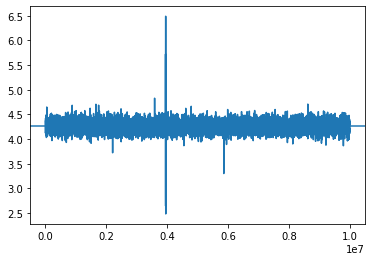

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento del file
THERMO_file = np.genfromtxt('/content/gruppo_7/TOLUENE 550/thermodynamics_equilibration_550.dat', delimiter=' ')

time = THERMO_file[:, 0]
T = THERMO_file[:, 4]
P = THERMO_file[:, 5]
V = THERMO_file[:, 6]

# Calcolo della media
P_media = np.mean(P)

# Plot della pressione e del suo valore medio
plt.plot(time, P)
plt.axhline(P_media)
print('P_media: ', P_media)

### Diffusion coefficient

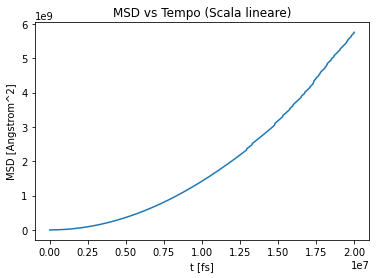

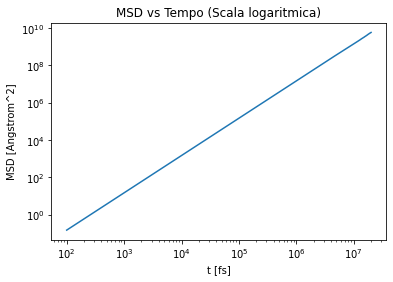

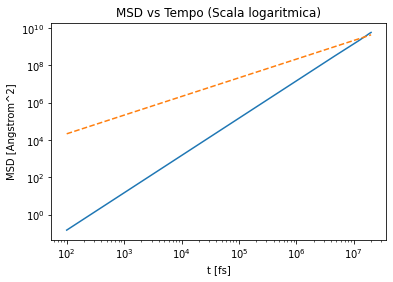

[35.6954658]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

MSD_file = np.genfromtxt('/content/gruppo_7/TOLUENE 550/msd_550.dat', delimiter=' ')
time = MSD_file[:, 0]
msd = MSD_file[:, 1]
plt.figure(1)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala lineare)")
plt.plot(time,msd)

plt.figure(2)
plt.loglog(time,msd)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")

def linea_retta(t,D_550):
  return 6*D_550*t

D_550, err = curve_fit(linea_retta,time,msd)
plt.figure(3)
plt.loglog(time,msd)
plt.loglog(time,linea_retta(time,D_550), '--')
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")
plt.show()
print(D_550)

## TOLUENE 573

### equilibration fluctuation

P_media:  4.435173160523901


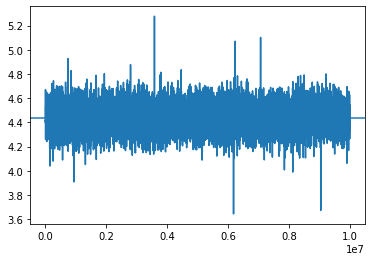

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento del file
THERMO_file = np.genfromtxt('/content/gruppo_7/TOLUENE 573/thermodynamics_equilibration_573.dat', delimiter=' ')

time = THERMO_file[:, 0]
T = THERMO_file[:, 4]
P = THERMO_file[:, 5]
V = THERMO_file[:, 6]

# Calcolo della media
P_media = np.mean(P)

# Plot della pressione e del suo valore medio
plt.plot(time, P)
plt.axhline(P_media)
print('P_media: ', P_media)

### Diffusion coefficient

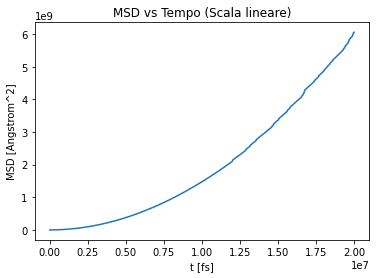

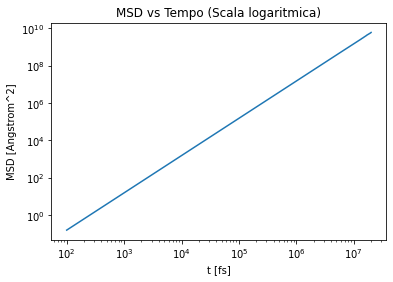

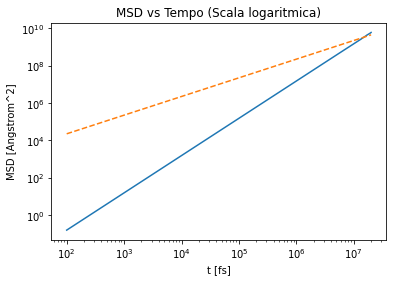

[37.41818061]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

MSD_file = np.genfromtxt('/content/gruppo_7/TOLUENE 573/msd_573.dat', delimiter=' ')
time = MSD_file[:, 0]
msd = MSD_file[:, 1]
plt.figure(1)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala lineare)")
plt.plot(time,msd)

plt.figure(2)
plt.loglog(time,msd)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")

def linea_retta(t,D_573):
  return 6*D_573*t

D_573, err = curve_fit(linea_retta,time,msd)
plt.figure(3)
plt.loglog(time,msd)
plt.loglog(time,linea_retta(time,D_573), '--')
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")
plt.show()
print(D_573)

## TOLUENE 590

### equilibration fluctuation

P_media:  4.566109228019004


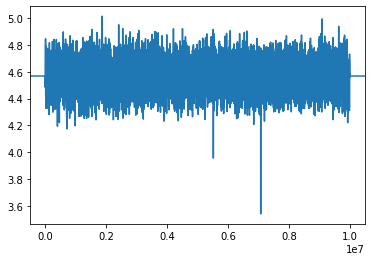

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento del file
THERMO_file = np.genfromtxt('/content/gruppo_7/TOLUENE 590/thermodynamics_equilibration_590.dat', delimiter=' ')

time = THERMO_file[:, 0]
T = THERMO_file[:, 4]
P = THERMO_file[:, 5]
V = THERMO_file[:, 6]

# Calcolo della media
P_media = np.mean(P)

# Plot della pressione e del suo valore medio
plt.plot(time, P)
plt.axhline(P_media)
print('P_media: ', P_media)

### Diffusion coefficient

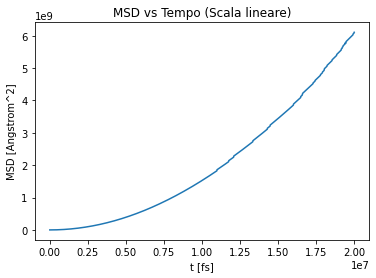

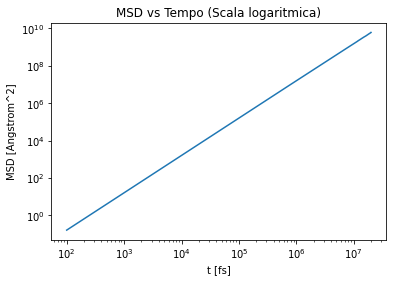

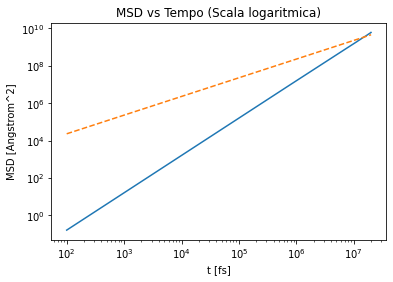

[38.1545605]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

MSD_file = np.genfromtxt('/content/gruppo_7/TOLUENE 590/msd_590.dat', delimiter=' ')
time = MSD_file[:, 0]
msd = MSD_file[:, 1]
plt.figure(1)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala lineare)")
plt.plot(time,msd)

plt.figure(2)
plt.loglog(time,msd)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")

def linea_retta(t,D_590):
  return 6*D_590*t

D_590, err = curve_fit(linea_retta,time,msd)
plt.figure(3)
plt.loglog(time,msd)
plt.loglog(time,linea_retta(time,D_590), '--')
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")
plt.show()
print(D_590)

## TOLUENE 620

### equilibration fluctuation

P_media:  4.79812569357397


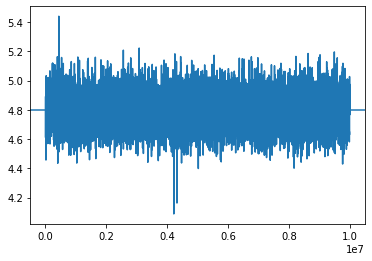

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento del file
THERMO_file = np.genfromtxt('/content/gruppo_7/TOLUENE 620/thermodynamics_equilibration_620.dat', delimiter=' ')

time = THERMO_file[:, 0]
T = THERMO_file[:, 4]
P = THERMO_file[:, 5]
V = THERMO_file[:, 6]

# Calcolo della media
P_media = np.mean(P)

# Plot della pressione e del suo valore medio
plt.plot(time, P)
plt.axhline(P_media)
print('P_media: ', P_media)

### Diffusion coefficient

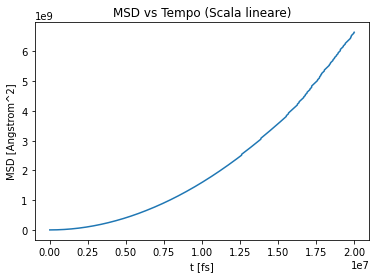

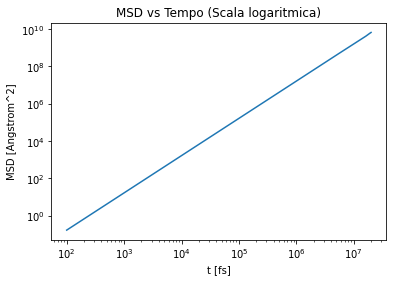

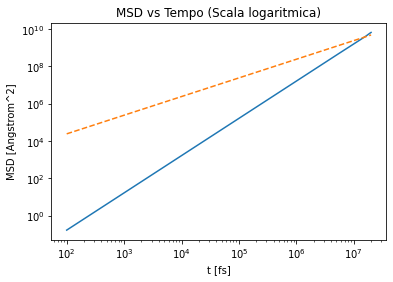

[40.49906879]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

MSD_file = np.genfromtxt('/content/gruppo_7/TOLUENE 620/msd_620.dat', delimiter=' ')
time = MSD_file[:, 0]
msd = MSD_file[:, 1]
plt.figure(1)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala lineare)")
plt.plot(time,msd)

plt.figure(2)
plt.loglog(time,msd)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")

def linea_retta(t,D_620):
  return 6*D_620*t

D_620, err = curve_fit(linea_retta,time,msd)
plt.figure(3)
plt.loglog(time,msd)
plt.loglog(time,linea_retta(time,D_620), '--')
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")
plt.show()
print(D_620)

## TOLUENE 630

### equilibration fluctuation

P_media:  4.878421665353952


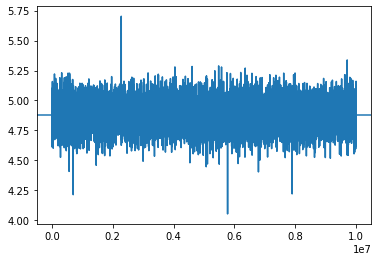

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento del file
THERMO_file = np.genfromtxt('/content/gruppo_7/TOLUENE 630/thermodynamics_equilibration_630.dat', delimiter=' ')

time = THERMO_file[:, 0]
T = THERMO_file[:, 4]
P = THERMO_file[:, 5]
V = THERMO_file[:, 6]

# Calcolo della media
P_media = np.mean(P)

# Plot della pressione e del suo valore medio
plt.plot(time, P)
plt.axhline(P_media)
print('P_media: ', P_media)

### Diffusion coefficient

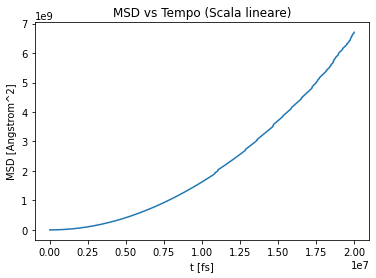

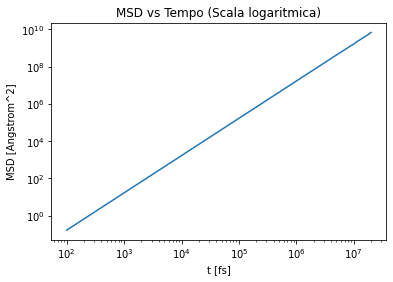

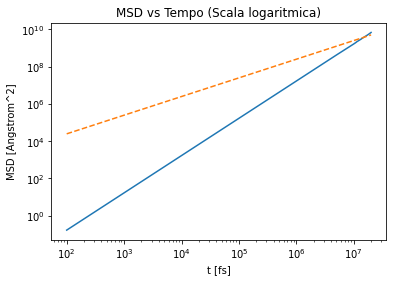

[41.10458772]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

MSD_file = np.genfromtxt('/content/gruppo_7/TOLUENE 630/msd_630.dat', delimiter=' ')
time = MSD_file[:, 0]
msd = MSD_file[:, 1]
plt.figure(1)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala lineare)")
plt.plot(time,msd)

plt.figure(2)
plt.loglog(time,msd)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")

def linea_retta(t,D_630):
  return 6*D_630*t

D_630, err = curve_fit(linea_retta,time,msd)
plt.figure(3)
plt.loglog(time,msd)
plt.loglog(time,linea_retta(time,D_630), '--')
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")
plt.show()
print(D_630)